In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [11]:
def read_data(data):
    """Read the data from the file."""
    return np.loadtxt(data)

In [12]:
name = "L16_J1.00_q8"
# folder = f"results/{name}/"
folder = f"results/good_results/{name}/"

file = f"{folder}{name}.txt"

q=int(name[-1])
print(q)

8


In [13]:
lng = read_data(file)

In [14]:
lng = lng[lng[:, 1] > 1]

In [15]:
# save this data as a file txt with two columns
savename = f"{folder}{name}_no0.txt"
np.savetxt(savename, lng, fmt='%d %d')

In [16]:
beta_c = np.log(1 + np.sqrt(q))
print(beta_c)

1.342454046453526


Text(0, 0.5, 'log[$\\Omega$(E)]')

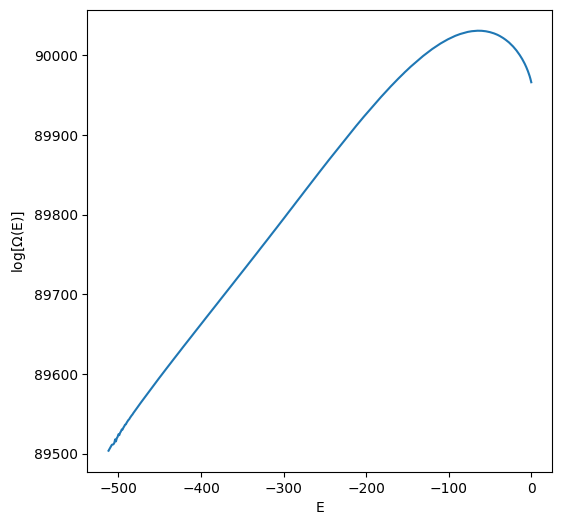

In [17]:
plt.figure(figsize=(6, 6))
plt.plot(lng[:, 0], lng[:, 1])
plt.xlabel('E')
plt.ylabel(r'log[$\Omega$(E)]')


In [18]:
from ipywidgets import interact, FloatSlider

log_omega = lng[:, 1]
E = lng[:, 0]

def update_plot(beta):
   
    W = log_omega - beta * E
    W_max = np.max(W)

    log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))

    A_ = log_Z - W
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(-E, A_, label=f'beta={beta}')
    plt.xlabel('E')
    plt.ylabel('A(E)')
    plt.title('A(E)')

    plt.legend()
    plt.grid()
    plt.show()

# Interactive slider
interact(update_plot, beta=FloatSlider(value=beta_c, min=0, max=4, step=0.0001))


interactive(children=(FloatSlider(value=1.342454046453526, description='beta', max=4.0, step=0.0001), Output()…

<function __main__.update_plot(beta)>

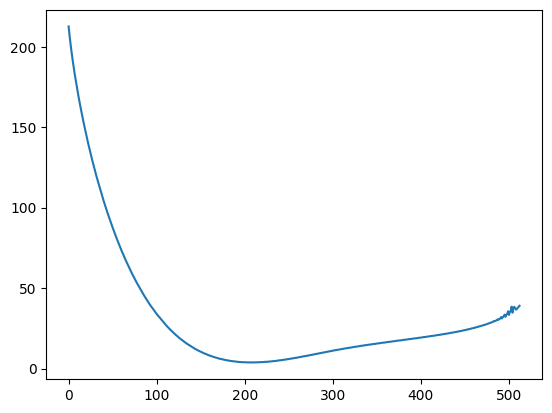

In [19]:
# Obtain A
log_omega = lng[:, 1]
E = lng[:, 0]
beta = beta_c-0.1
W = log_omega - beta * E
W_max = np.max(W)

log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))

A_ = log_Z - W

plt.plot(-E, A_, label='A(E)')
plt.show()


In [20]:
def A(E, beta):
    W = log_omega - beta * E
    W_max = np.max(W)
    log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))
    return log_Z - W

In [21]:
def search_minima(beta, min, max):
    """
    Search for the minima of A(E) for a given beta.
    
    Parameters:
    -----------
    beta: np.array
        Values of beta to search the minima.
    """
    E_A = [] # must be a list of arrays with the values of E and A for each minima for each beta
    diff = []
    E_max = []
    A_max = []
    for b in beta:
        A_int = A(E, b)
        A_int = interp1d(-E, A_int, kind='cubic')

        E_interp = np.linspace(min, max, 1000)

        # sort the values of A and E according to A sorted
        A_sorted = np.sort(A_int(E_interp))
        E_sorted = E_interp[np.argsort(A_int(E_interp))]

        E_sor = []
        A_sor = []
        E_sor.append(E_sorted[0])
        A_sor.append(A_sorted[0])

        

        for i in range(1, E_sorted.size):
            if np.abs(E_sorted[i] - E_sorted[0]) > 40:
                E_sor.append(E_sorted[i])
                A_sor.append(A_sorted[i])
                break
        E_A.append(np.column_stack((E_sor, A_sor)))
        diff.append(np.abs(A_sor[0]-A_sor[1]))
        
        # E between E_sor[0] and E_sor[1]
        A_aux = 0
        if E_sor[0] > E_sor[1]:
            A_aux = np.max(A_int(E_interp)[(E_interp >= E_sor[1]) & (E_interp <= E_sor[0])])
            
        else:
            A_aux = np.max(A_int(E_interp)[(E_interp >= E_sor[0]) & (E_interp <= E_sor[1])])
        E_max.append(E_interp[np.where(A_int(E_interp) == A_aux)])
        A_max.append(A_aux)

    # print the value of E that corresponds to A_aux
        
    E_A = np.array(E_A)
    diff = np.array(diff)
    E_max = np.array(E_max)
    A_max = np.array(A_max)
    
    # sort diff from lowest to highest
    EA = E_A[np.argsort(diff)]
    E_max = E_max[np.argsort(diff)]
    A_max = A_max[np.argsort(diff)]

    # dataframe with columns beta_sorted, E_A, diff
    df = pd.DataFrame({'beta_sorted': beta[np.argsort(diff)], 'E_min_0': EA[:, 0, 0], 'E_min_1': EA[:, 1, 0], 'A_0': EA[:, 0, 1], 'A_1': EA[:, 1, 1], 'diff': np.sort(diff), 'E_max': E_max[:, 0], 'A_max': A_max})
    
    return df


In [22]:
beta = np.linspace(beta_c-0.1, beta_c+0.1, 1000)
beta_df = search_minima(beta, 150, 480)

In [23]:
beta_df

,beta_sorted,E_min_0,E_min_1,A_0,A_1,diff,E_max,A_max
0,1.330342,421.861862,246.786787,5.128743,5.138838,0.010095,325.075075,6.175883
1,1.330142,246.786787,421.861862,5.120034,5.144989,0.024955,325.075075,6.172752
2,1.330542,421.861862,246.786787,5.112748,5.157893,0.045145,325.075075,6.179265
3,1.329942,246.786787,421.861862,5.101480,5.161486,0.060005,325.075075,6.169873
4,1.330742,421.861862,246.786787,5.097002,5.177197,0.080195,325.075075,6.182896
...,...,...,...,...,...,...,...,...
995,1.441653,473.723724,433.423423,3.587891,6.372557,2.784665,433.423423,6.372557
996,1.441853,473.723724,433.423423,3.587729,6.380463,2.792734,433.423423,6.380463
997,1.442054,473.723724,433.423423,3.587578,6.388379,2.800802,433.423423,6.388379
998,1.442254,473.723724,433.423423,3.587436,6.396306,2.808870,433.423423,6.396306


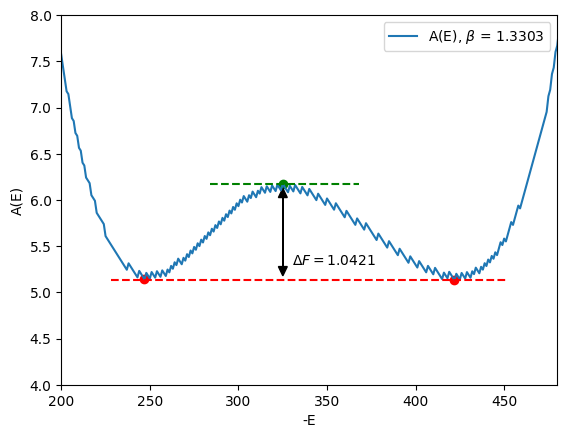

In [102]:
plt.plot(-E, A(E, beta_df["beta_sorted"][0]), label=r'A(E), $\beta$ = {:.4f}'.format(beta_df["beta_sorted"][0]))
plt.scatter(beta_df["E_min_0"][0], beta_df["A_0"][0], color='red')
plt.scatter(beta_df["E_min_1"][0], beta_df["A_1"][0], color='red')
plt.scatter(beta_df["E_max"][0], beta_df["A_max"][0], color='green')
# add text with the value of the difference 
deltaF = beta_df["A_max"][0] - ((beta_df["A_0"][0] + beta_df["A_1"][0])/2)
plt.text(330, 5.3, r"$\Delta F = {:.4f}$".format(deltaF), fontsize=10)

plt.arrow(beta_df["E_max"][0], beta_df["A_0"][0]+0.15, 0, beta_df["A_max"][0]-beta_df["A_0"][0]-0.3, head_width=5, head_length=0.1, fc='black', ec='black')
plt.arrow(beta_df["E_max"][0], beta_df["A_max"][0]-0.15, 0, -beta_df["A_max"][0]+beta_df["A_0"][0]+0.3, head_width=5, head_length=0.1, fc='black', ec='black')

plt.axhline(y=beta_df["A_max"][0], color='green', xmin=0.3, xmax=0.6, linestyle='--')
plt.axhline(y=(beta_df["A_0"][0] + beta_df["A_1"][0])/2,  xmin=0.1, xmax=0.9, color='red', linestyle='--')

plt.xlabel('-E')
plt.ylabel('A(E)')
plt.xlim(200, 480)
plt.ylim(4, 8)
plt.legend()
plt.show()


In [29]:
deltaF = beta_df["A_max"][0] - ((beta_df["A_0"][0] + beta_df["A_1"][0])/2)
print(deltaF)

1.0420929162920336


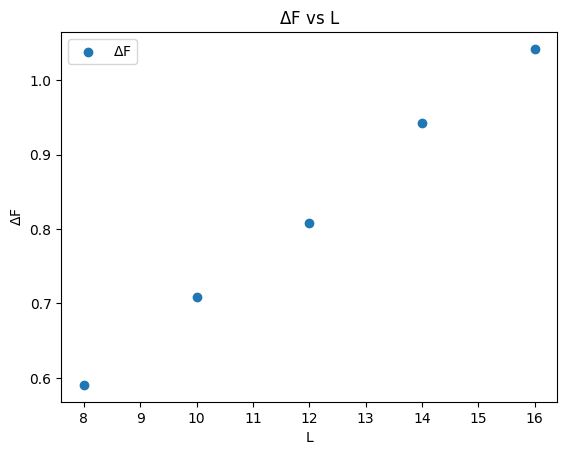

In [33]:
L_deltaF = np.loadtxt("L_deltaF.txt")

plt.scatter(L_deltaF[:, 0], L_deltaF[:, 1], label=r'$\Delta$F')
plt.xlabel('L')
plt.ylabel(r'$\Delta$F')
plt.title(r'$\Delta$F vs L')
plt.legend()
plt.show()